In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/multiple linear regression/car_data_v2.csv')

In [26]:
#print 1st five rows
df.head()

,car_name,brand,model,vehicle_age,km_driven,mileage,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,19.70,46.30,5,120000
1,Maruti Alto,Maruti,Alto,9,37000,20.92,67.10,5,226000
2,Maruti Wagon R,Maruti,Wagon R,8,35000,18.90,67.10,5,350000
3,Maruti Wagon R,Maruti,Wagon R,3,17512,20.51,67.04,5,410000
4,Hyundai Venue,Hyundai,Venue,2,20000,18.15,118.35,5,1050000


In [27]:
#check shape of the dataframe
df.shape

(2119, 9)

In [28]:
#inspect dataset using info, describe function
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       2119 non-null   object 
 1   brand          2119 non-null   object 
 2   model          2119 non-null   object 
 3   vehicle_age    2119 non-null   int64  
 4   km_driven      2119 non-null   int64  
 5   mileage        2119 non-null   float64
 6   max_power      2119 non-null   float64
 7   seats          2119 non-null   int64  
 8   selling_price  2119 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 149.1+ KB


,vehicle_age,km_driven,mileage,max_power,seats,selling_price
count,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2.119000e+03
mean,6.153374,42207.621992,22.574856,61.802931,5.002832,3.287744e+05
std,3.524845,27950.561196,3.008683,13.112960,0.176503,1.496699e+05
min,0.000000,581.000000,14.400000,38.400000,4.000000,4.000000e+04
25%,4.000000,21000.000000,20.510000,53.260000,5.000000,2.490000e+05
50%,5.000000,38000.000000,22.740000,67.000000,5.000000,3.150000e+05
75%,8.000000,58494.000000,23.950000,67.050000,5.000000,3.900000e+05
max,29.000000,425785.000000,33.540000,123.370000,7.000000,1.240000e+06


In [29]:
#check null values
df.isnull().sum()

car_name         0
brand            0
model            0
vehicle_age      0
km_driven        0
mileage          0
max_power        0
seats            0
selling_price    0
dtype: int64

<Axes: >

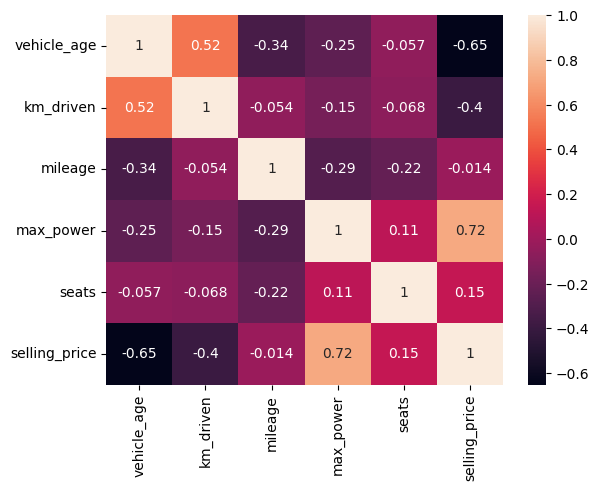

In [30]:
#study heatmap
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlations on numeric columns
correlations = numeric_df.corr()

# Generate heatmap
sns.heatmap(correlations, annot=True)

#Write the code below

#Features and target

X = df[[ 'vehicle_age', 'max_power']]

y = df['selling_price']


In [31]:
X =df[['vehicle_age','max_power']]
y =df['selling_price']

#Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

#Fit the multiple linear regression model

model = LinearRegression()

model.fit(X_train, y_train)

In [33]:
model =LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#Get the model coefficients

intercept = model.intercept_

intercept


In [34]:
intercept=model.intercept_
intercept

35445.53578446584

coef = model.coef_

coef

In [35]:
coef=model.coef_
coef

array([-21456.23348689,   6892.51033915])

#Predictions

y_pred = model.predict(X_test)

In [36]:
y_pred =model.predict(X_test)

#Evaluate the model

#Calculate MAE

mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")



#Calculate MSE

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


#Calculate RMSE

rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")

In [37]:
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error:{mae}")
mse=mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error:{mse}")
rmse=np.sqrt(mse)
print(f"Root Mean Squared Error:{rmse}")
r2=r2_score(y_test,y_pred)
print(f"R^2 Score:{r2}")

Mean Absolute Error:56055.71430710781
Mean Squared Error:5410768789.795569
Root Mean Squared Error:73557.9281233204
R^2 Score:0.7024344314281372


In [38]:
from sklearn import metrics as d
mae=d.mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error:{mae}")
mse=d.mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error:{mse}")
r2=d.r2_score(y_test,y_pred)
print(f"R^2 Score:{r2}")

Mean Absolute Error:56055.71430710781
Mean Squared Error:5410768789.795569
R^2 Score:0.7024344314281372


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



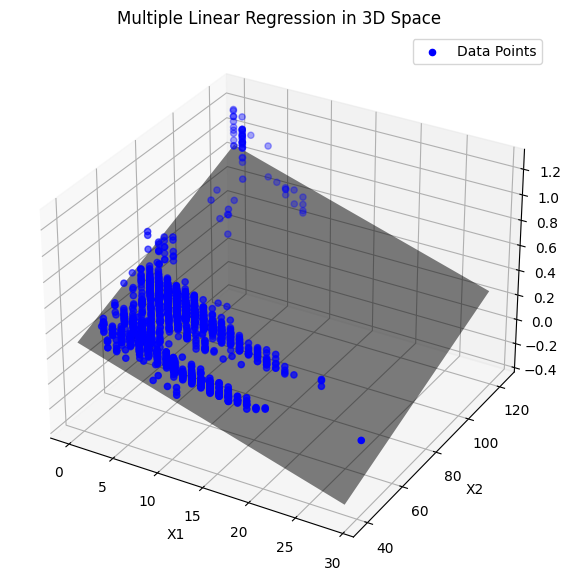

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a mesh grid for the independent variables
x1_grid, x2_grid = np.meshgrid(np.linspace(df.vehicle_age.min(), df.vehicle_age.max(), 20), np.linspace(df.max_power.min(), df.max_power.max(), 20))

# Predict Y values based on the regression model
Y_grid = model.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()])
Y_grid = Y_grid.reshape(x1_grid.shape)

# Plot the original data points and the regression plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.vehicle_age, df.max_power, df.selling_price, color='blue', label='Data Points')
ax.plot_surface(x1_grid, x2_grid, Y_grid, color='None', alpha=0.5, rstride=100, cstride=100)
ax.set_title('Multiple Linear Regression in 3D Space')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.legend()
plt.show()


In [40]:
import plotly.graph_objs as go
import plotly.io as pio


# Create a mesh grid for the independent variables
vehicle_age_grid, max_power_grid = np.meshgrid(
    np.linspace(df.vehicle_age.min(), df.vehicle_age.max(), 20),
    np.linspace(df.max_power.min(), df.max_power.max(), 20)
)

# Predict selling_price values based on the regression model
selling_price_grid = (intercept +
                      coef[0] * vehicle_age_grid +
                      coef[1] * max_power_grid)

# Create traces for the data points and the regression plane
data_points = go.Scatter3d(
    x=df['vehicle_age'],
    y=df['max_power'],
    z=df['selling_price'],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

regression_plane = go.Surface(
    x=vehicle_age_grid,
    y=max_power_grid,
    z=selling_price_grid,
    colorscale='Viridis',
    opacity=0.5,
    name='Regression Plane'
)

# Layout for the plot
layout = go.Layout(
    title='3D Linear Regression: Vehicle Age vs Max Power vs Selling Price',
    scene=dict(
        xaxis_title='Vehicle Age',
        yaxis_title='Max Power',
        zaxis_title='Selling Price'
    ),
    showlegend=True
)
# Create the figure
fig = go.Figure(data=[data_points, regression_plane], layout=layout)

# Show the plot
pio.show(fig)